A notebook to help come up with an effective strategy for the Riddler battle royale. See the Riddler Classic here: https://fivethirtyeight.com/features/are-you-the-best-warlord/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Generating Random Troop Deployments

First, come up with the best way to randomly generate the deployments of troops.

The first attempt will be, one by one, taking each troop and randomly assigning them to a castle.

In [3]:
# wrapper function to generate random deployment(s) of troops among castles
def _gen_deployments(troops, castles, n):
    # troops = total number of troops (100 in the riddler battle)
    # castles = number of castles (10 in the riddler battle)
    # n = number of possible deployments to create
    return np.random.multinomial(troops, np.ones(castles)/castles, size=n)

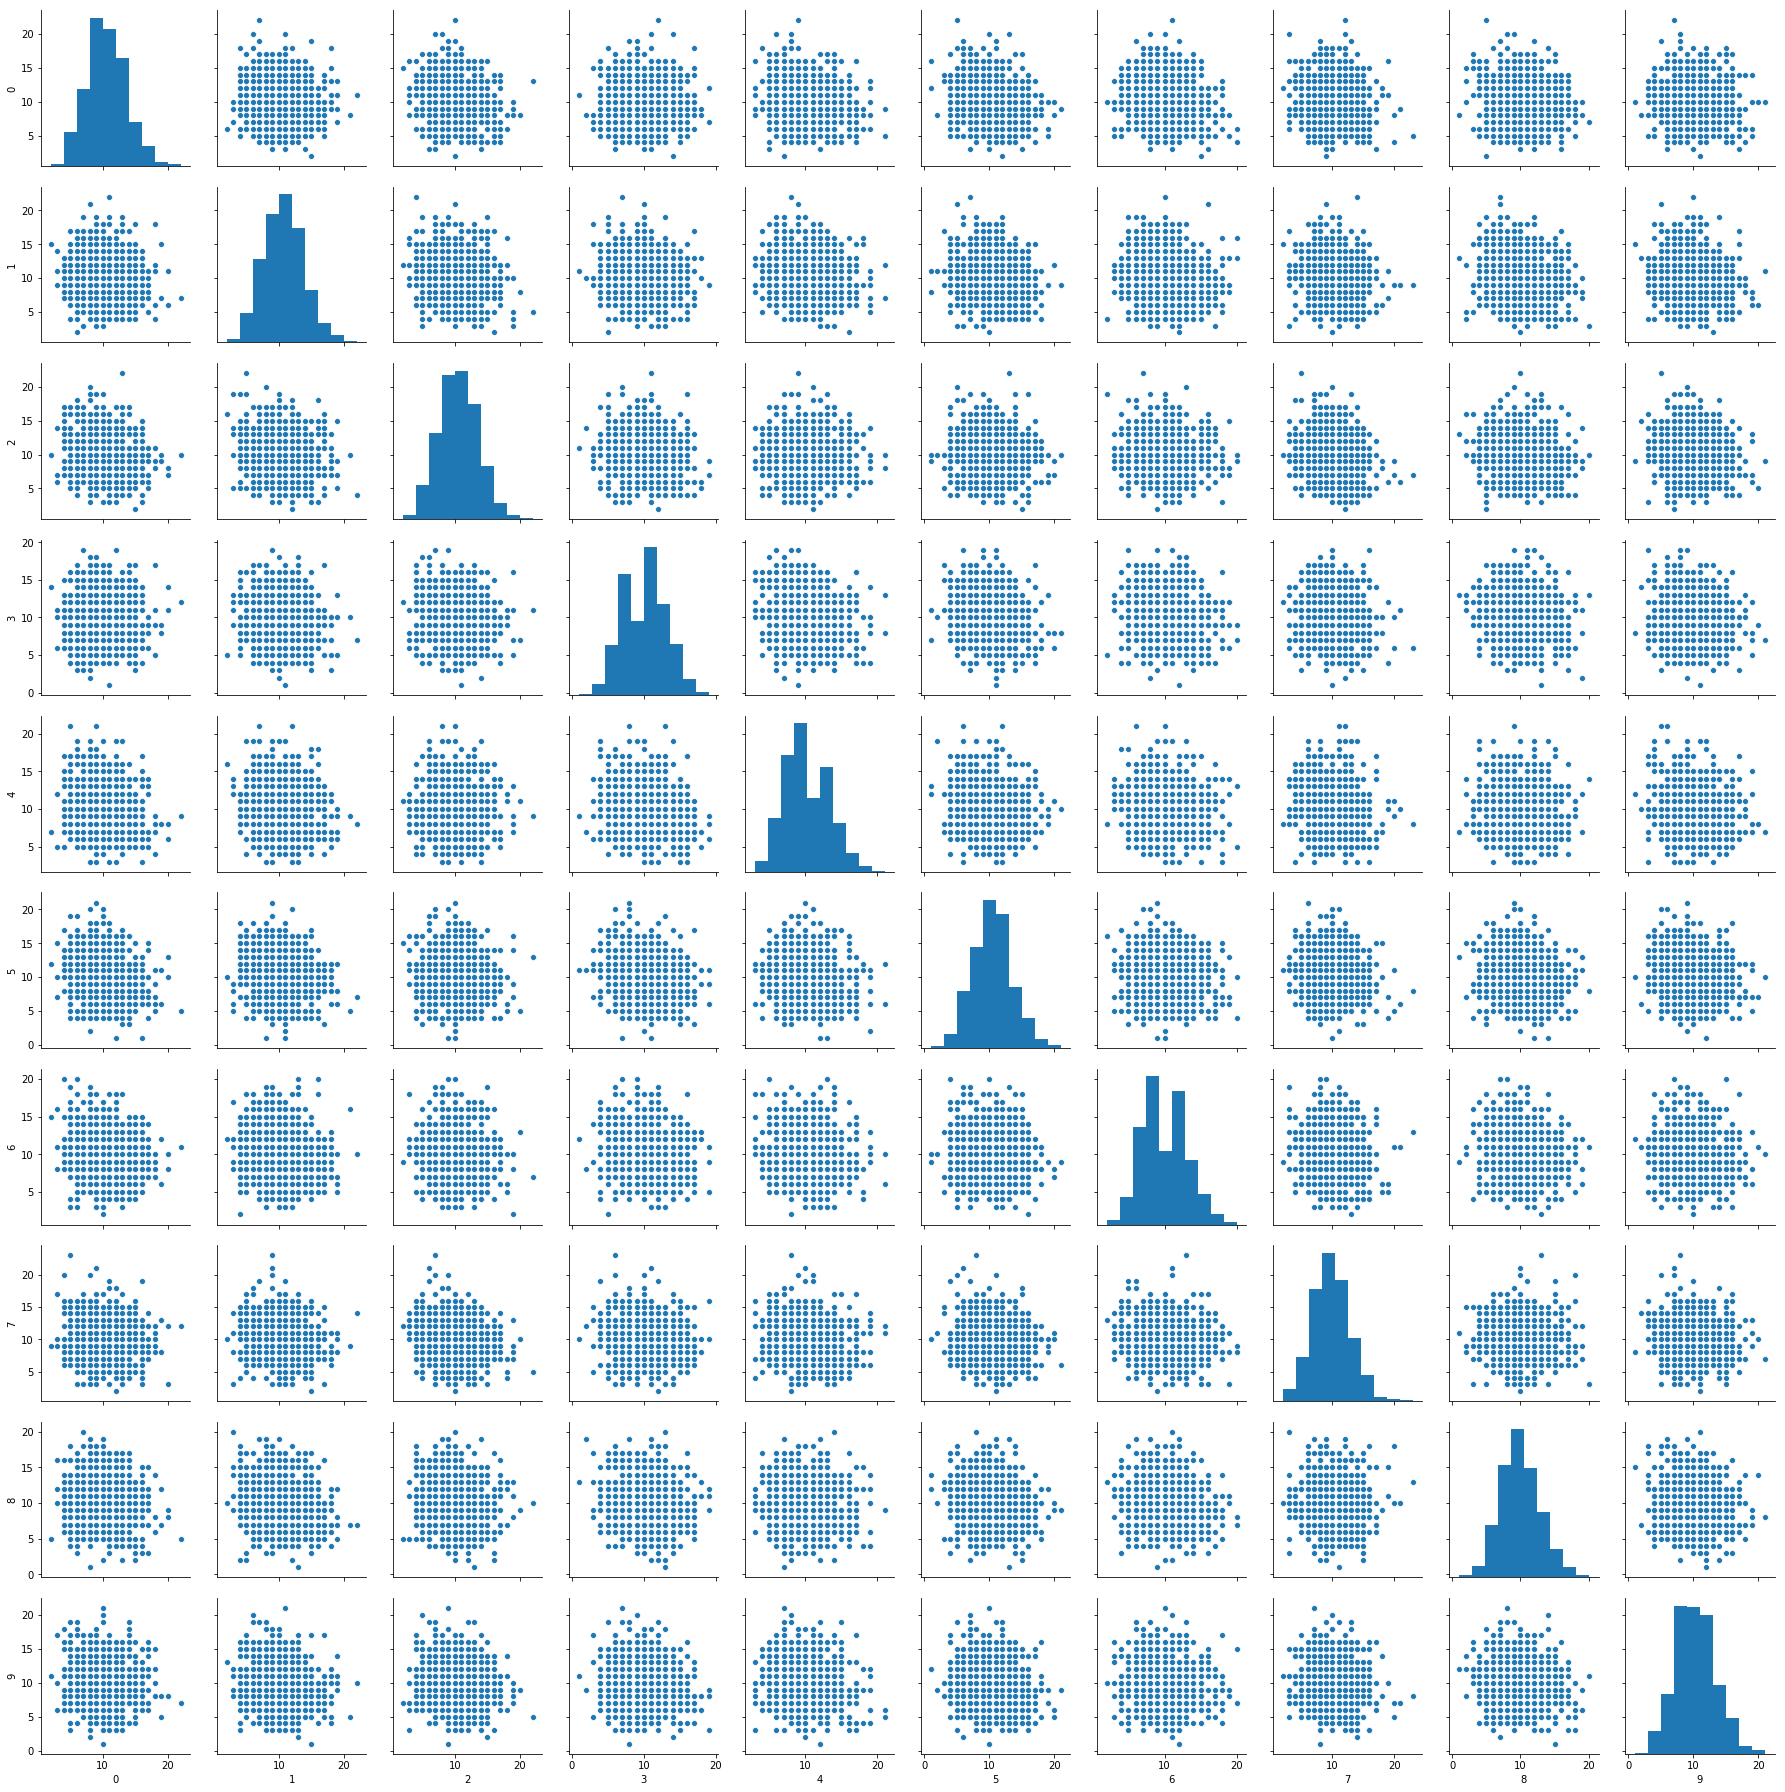

In [10]:
# look at the distributions
sns.pairplot(pd.DataFrame(_gen_deployments(100, 10, 1000)));

Random deployment generator 2

In [4]:
# wrapper function to generate random deployment(s) of troops among castles
def _gen_deployments2(troops, castles, n):
    # troops = total number of troops (100 in the riddler battle)
    # castles = number of castles (10 in the riddler battle)
    # n = number of possible deployments to create
    b = []
    for a in np.sort(np.random.randint(1,troops+1,(n,castles-1))):
        b.append((np.concatenate((a,np.array([troops])))) - (np.concatenate((np.array([0]),a))))
        
    return b

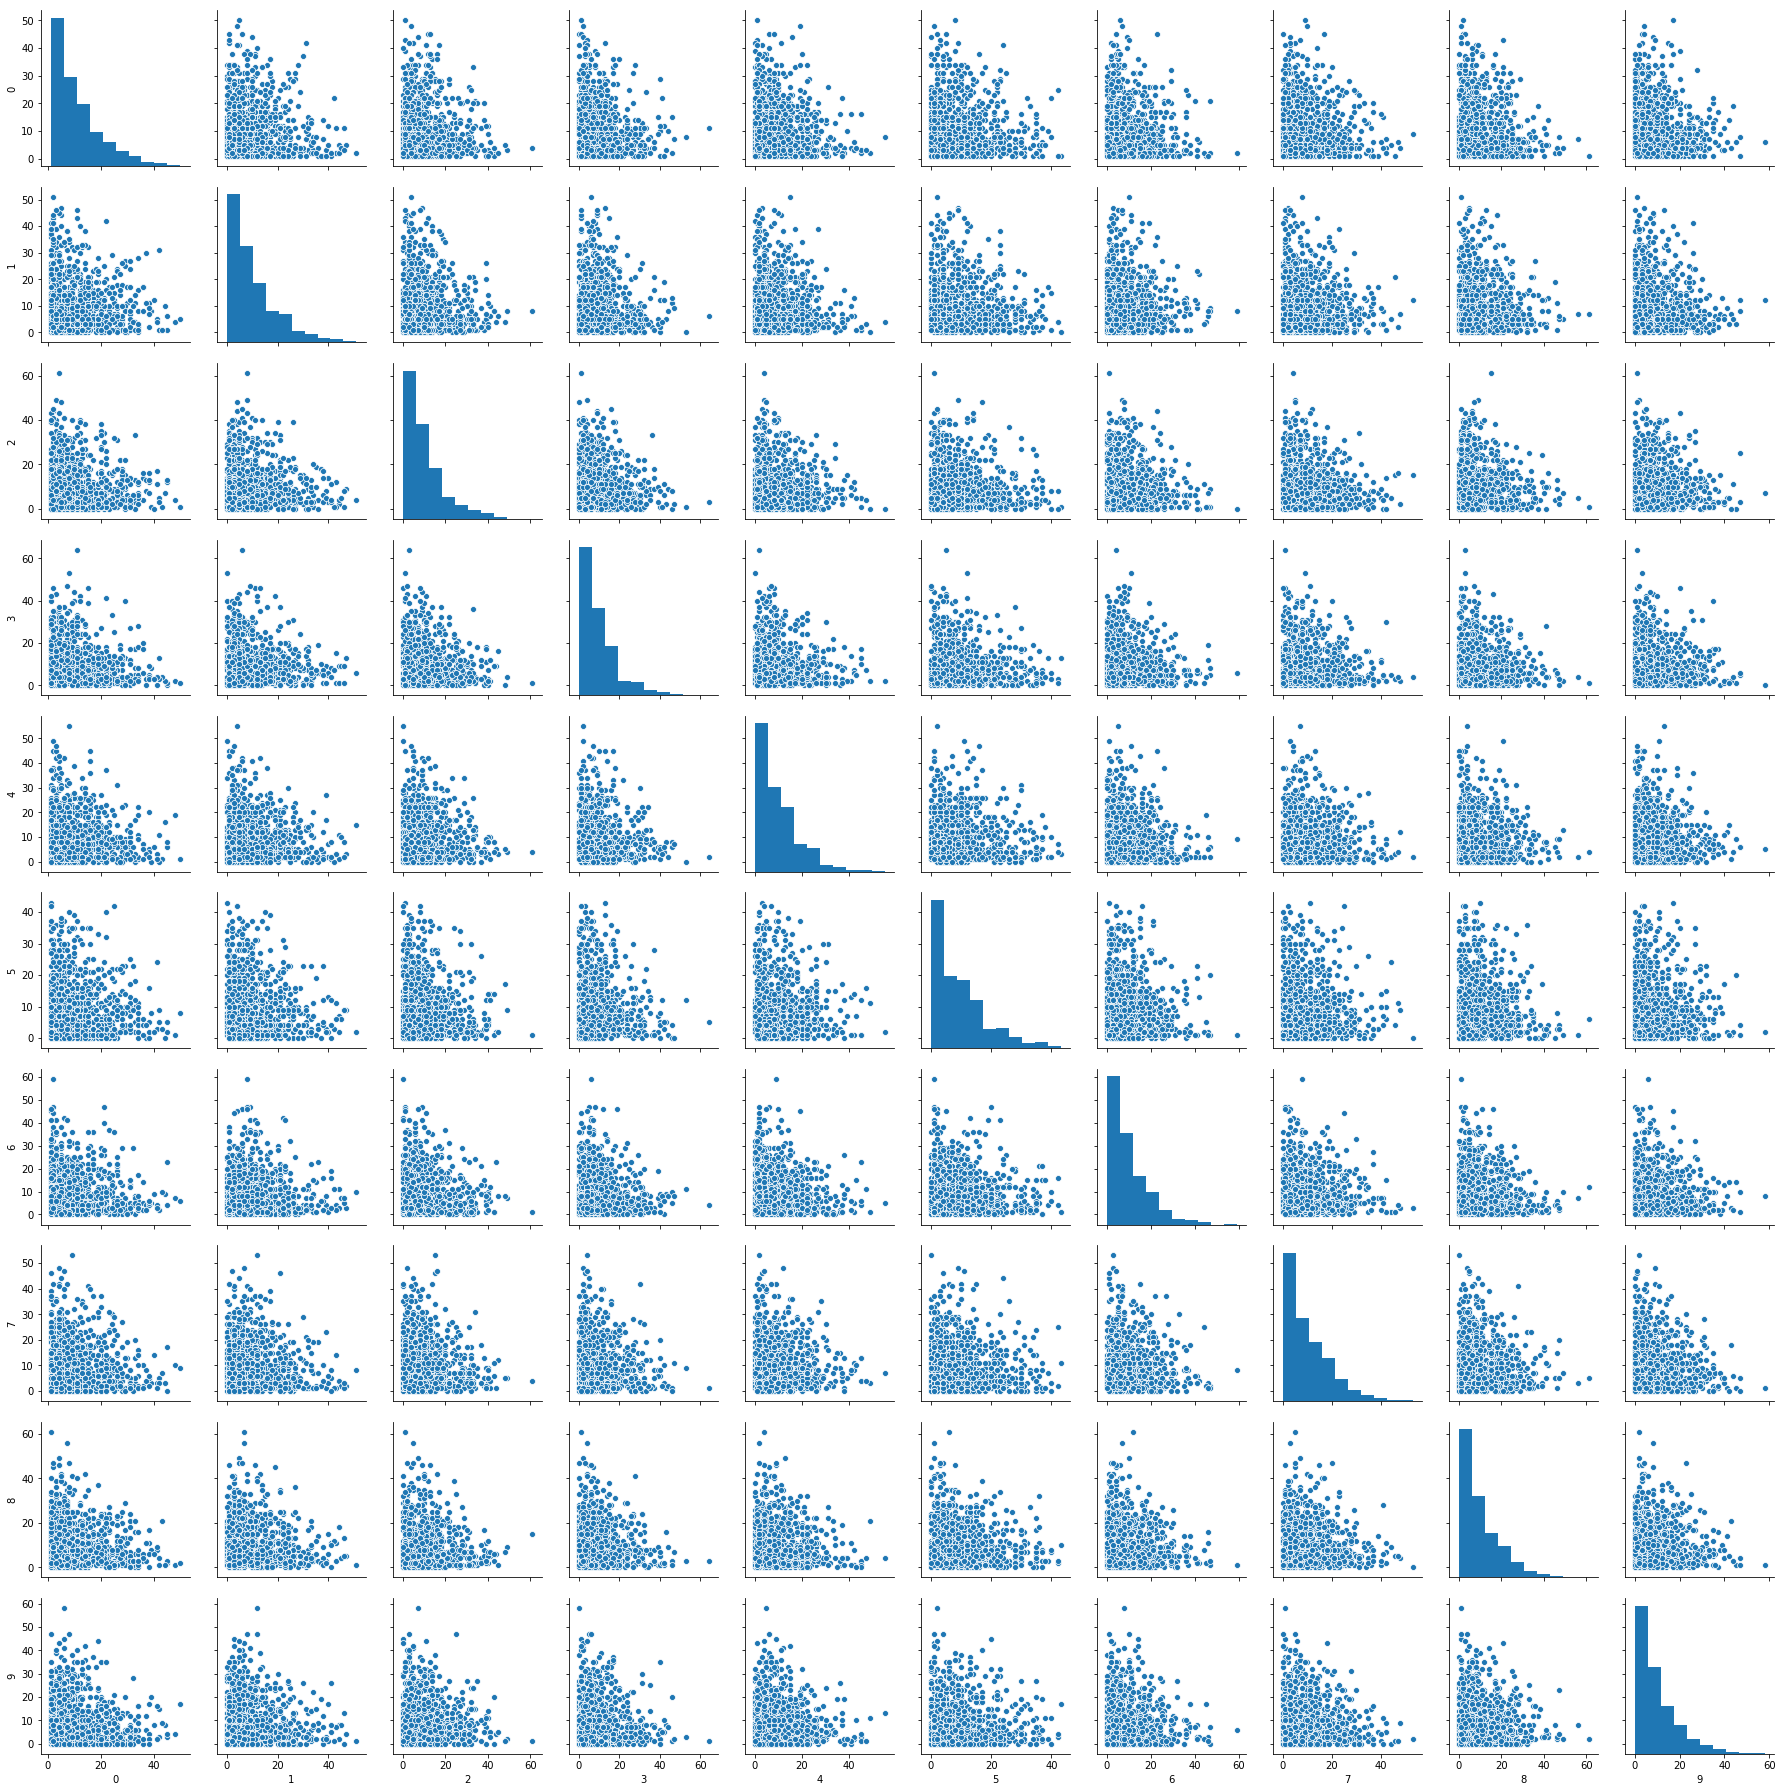

In [81]:
sns.pairplot(pd.DataFrame(_gen_deployments2(100, 10, 1000)));

# Time to Battle

I'll use a combination of the two random deployment methods above, to get some variation in the strategies.

In [5]:
# Function to generate n random armies, and battle them all against each other in a round robin
def _BATTLE(troops, castles, n, p):
    # n is the number of armies to generate
    # p is the fraction of armies to be generated from the first method above (remainder from second method)
    n_1 = round(n*p)
    n_2 = round(n*(1-p))
    
    armies = np.append(_gen_deployments(troops, castles, n_1), _gen_deployments2(troops, castles, n_2), axis=0)
    
    df = pd.DataFrame(armies).T
    wins = np.zeros(n)
    losses = np.zeros(n)
    ties = np.zeros(n)
    
    winning_score = sum(range(castles+1))/2
    
    for a in df.columns:
        for b in df.columns[a+1:]:
            a_score = (((df[a]>df[b]).astype(int)) * (df.index+1)).sum()
            if a_score>winning_score:
                wins[a]+=1
                losses[b]+=1
            elif a_score<winning_score:
                losses[a]+=1
                wins[b]+=1
            else:
                ties[a]+=1
                ties[b]+=1
            
                    
    df_out = pd.DataFrame()
    df_out['army'] = armies.tolist()
    df_out['wins'] = wins
    df_out['losses'] = losses
    df_out['ties'] = ties
    
    return df_out

In [6]:
df = _BATTLE(100, 10, 1500, 0.25)
df.sort_values(by='wins', ascending=False).head()

,army,wins,losses,ties
1424,"[3, 3, 6, 13, 6, 18, 9, 11, 14, 17]",1392.0,107.0,0.0
1175,"[1, 0, 1, 13, 14, 13, 11, 17, 6, 24]",1377.0,122.0,0.0
968,"[5, 6, 1, 9, 3, 9, 11, 19, 18, 19]",1365.0,134.0,0.0
1072,"[1, 15, 11, 0, 5, 13, 10, 15, 12, 18]",1343.0,156.0,0.0
1447,"[1, 3, 4, 10, 3, 8, 18, 14, 10, 29]",1343.0,156.0,0.0
